In [15]:
%matplotlib inline

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster.hierarchical import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

*Кластеризация* - обучение без учителя. 
У нас нет меток, которые бы нам говорили, к какой группе относится тот или иной объект. Наша задача - объединить объекты в группы на основании их "похожести".


Есть несколько неоднозначностей, связанных с задачей кластеризации (К.В.Воронцов):

 - точной постановки задачи кластеризации нет;
 - существует много критериев качества кластеризации;
 - существует много эвристических методов кластеризации;
 - число кластеров, как правило, неизвестно заранее;
 - результат кластеризации существенно зависит от метрики ρ, которую эксперт задаёт субъективно
 
Зачем она нужна:
  - упростить дальнейшую обработку данных, разбить множество на группы схожих объектов чтобы работать с каждой группой в отдельности (задачи классификации, регрессии, прогнозирования).
  - Сократить объём хранимых данных, оставив по одному представителю от каждого кластера (задачи сжатия данных).
  - Выделить нетипичные объекты, которые не подходят ни к одному из кластеров (задачи одноклассовой классификации, поиск аномалий).
  - Построить иерархию множества объектов (задачи таксономии).



In [16]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

## K-Means (алгоритм k-средних)

если про него в одну строчку, то: 
 - стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров

In [17]:
model = KMeans(n_clusters=3)
model.fit(X_iris) 
labels_km = model.labels_

#### посмотрим на результаты в 3D

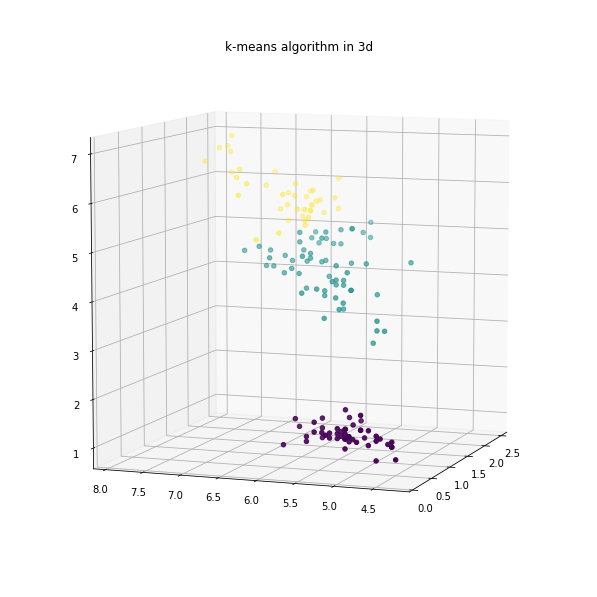

In [18]:
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()

ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels_km.astype(np.float))
plt.title('k-means algorithm in 3d')
plt.show()

#### а теперь в 2D

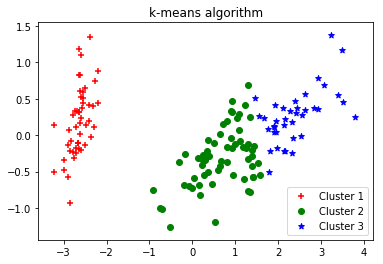

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
    if labels_km[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif labels_km[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif labels_km[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('k-means algorithm')
plt.show()

Минусы:
 - нужно заранее знть количество кластеров
 - чувствителен к выбору центроидам
 - не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному
 
Плюсы:
 - интуитивно понятен
 - удобен и популярен

## Agglomerative clustering

если опять кратко:
 - на каждом шаге выбираем для ближайших кластера, сливаем в один. Так пока не сольем все в один кластер.
Получается дендрограмма/выделяется таксономия.

In [20]:
model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
labels_aggl = model.fit_predict(X_iris)

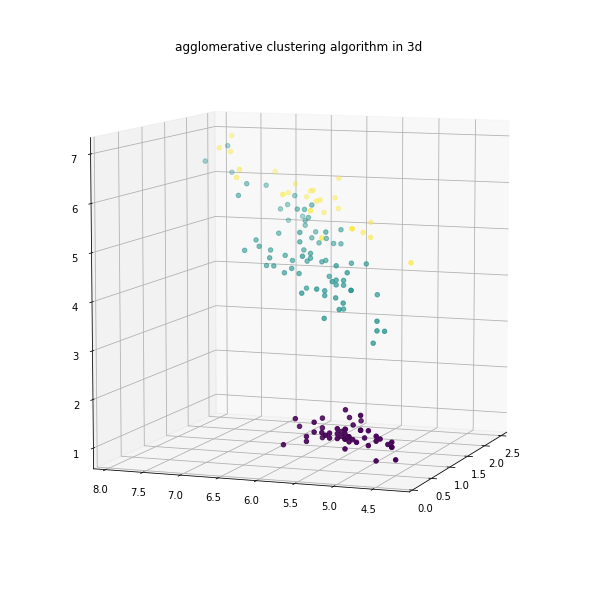

In [21]:
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()

ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels_aggl.astype(np.float))
plt.title('agglomerative clustering algorithm in 3d')
plt.show()

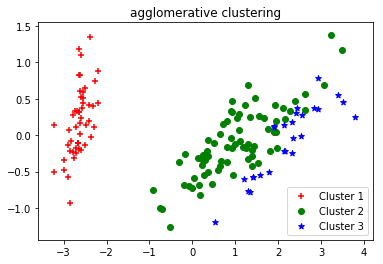

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
    if labels_aggl[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif labels_aggl[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif labels_aggl[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('agglomerative clustering')
plt.show()

А теперь, так как мы знаем правильные ответы (датасет размеченный, повезло), мы можем посмотреть, насколько хорошо отработали алогритмы

In [23]:
from sklearn.metrics import accuracy_score

print("accuracy_score k-means: {0:.3}%".format(100*accuracy_score(y_iris, labels_km)))
print("accuracy_score agglomerative: {0:.3}%".format(100*accuracy_score(y_iris, labels_aggl)))

accuracy_score k-means: 89.3%
accuracy_score agglomerative: 84.0%
